In [1]:
#Implementation of Random Forest and ADABOOST Classifiers and compare various classification models by accuracy score

In [2]:
# We are Creating a Random Forest Classification Model in Machine Learning
# A Random Forest is a classifier model of a machine learning model
# which is aggregated by many Decision Trees.

In [3]:
# We are importing pandas library to make dataframe
import pandas as pd

# we are also using a dataset which consisted by 3 features (Height, weight and gender)
# we are using huge volume (10000) of data with these features
ds = pd.read_csv('weight-height.csv')

# print the dataset
ds

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [4]:
# To know number of columns with their names
ds.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [5]:
# we are Choosing dependent and independent variables from the dataset
#split dataset in features (Independent) and target (Dependent) variable

ind_var = ['Height', 'Weight'] # It defines the independent variable
X = ds[ind_var] # Features or independent variables
y = ds.Gender # Target variable or dependent variable or response variable

In [6]:
# printing the vaues of independent variable
X

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [7]:
# printing the values of dependent variable
y

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: object

In [8]:
# To know that we have NaN values or not
ds1 = ds.dropna() # This method will drop NaN values
ds1.shape # Display the size of the dataset without NaN values

(10000, 3)

In [9]:
# We have prepared our dataset without any NaN Value 
# Or we have complete dataset

# Next step, we need to classify the data into training and testing dataset
#to split the dataset into train and test
from sklearn.model_selection import train_test_split

#split the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50)

In [10]:
# If we need to know the size of training and testing dataset, we can use shape variable. 
print (X_train.shape)
print (X_test.shape)

(5000, 2)
(5000, 2)


In [11]:
# So far we have prepared dataset and split dataset into training and testing dataset

# We have prepared our dataset and this is the time when we can build the model
# For this first we are creating Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

#Now we are creating object of the classifier with its some parameters
# As we know and we have also seen that a decision tree can be solved by the entropy method 
# to calculate impurity and then to get information gain.

# A forest is collection of many decision trees
vsk_rf = RandomForestClassifier (n_estimators = 120, criterion = 'entropy', max_depth = 10)

# n_estimators = total number of decision trees
# criterion = entropy or gini,by which to get impurity and can be calculated by decision trees
# max_depth = level of the tree or nodes are expanded until all leaves are pure.

# now we need to fit the model for its building purpose towards the training dataset
vsk_rf.fit (X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=120)

In [12]:
# we need to predict the model using testing dataset

#prediction on test dataset
y_pred_rf = vsk_rf.predict(X_test)

In [13]:
# Here we can display prediction values by Random Forest Classifier 
# and also know the size of the prediction based on testing dataset
print (y_pred_rf)
print(y_pred_rf.shape) # Size should be equal to testing data

['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
(5000,)


In [14]:
# So far we have completed the following steps:
# 1. Prepared the dataset
# 2. Build the model (RandomForestClassifier)
# 3. Predicted the model by testing dataset

# Now its time to measure the model

#To create the confusion matrix and get accuracy score with classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# we are comparing actual values and prediction values from testing dataset
# y_test is a testing variable of the dataset 
# while y_pred_rf is the predicted variable of the RandomForestClassifier
# Here we are evaluating our model

print(confusion_matrix(y_test, y_pred_rf))

print (accuracy_score(y_test, y_pred_rf)*100)

print (classification_report(y_test, y_pred_rf))

[[2261  203]
 [ 229 2307]]
91.36
              precision    recall  f1-score   support

      Female       0.91      0.92      0.91      2464
        Male       0.92      0.91      0.91      2536

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [15]:
# We are using training dataset to build the model

# Is there a good way to prove we have used a good model?
# or based on used features, is your model is better?

# Suppose you have 25 features and you have selected 20 fetures
# based on 20 features you are trying to build the model
# Is it possible that you have built the better?

# When you are choosing many features, then there is a chance we can have overfitting.

# Overfitting: Our model is over fitted towards the training dataset just like 
# more than 3 to 4 tea-spoons of sugar in your one cup of tea.
# So by this, the tea taste will be changed (it could be bitter rather than sweet)

# Finally we can say our model should not be overfit (selecting many features)
# and underfit (selecting limited or minimum features).

# This is the problem we can face when we have many independent variables (features)

#  BUT HERE WE ARE NOT NEED TO WORRY BECAUSE WE HAVE ONLY TWO INDEPENDENT FEATURES
# --------------------------------------------------------------------------------

# Let use see important features by the graph

# we can select important features to build the random forest algorithm model 
# in order to avoid the overfitting issue.

# For this we need to read the information from instance or object of the RandomForestClassifier
fea_imp = pd.Series (vsk_rf.feature_importances_, index=X.columns)

# feature_importances_ is public variable of RandomForestClassifier and 
# can be accessible by its object.

# X.columns = height and weight

In [16]:
# To display feature important values (between 0 and 1) of each feature
fea_imp

# It describes here weight is an important feature rather than height feature
# By selecting important features we are try to fit the model and removing overfitting or underfitting
# But here we are not need to worry.

Height    0.388362
Weight    0.611638
dtype: float64

Text(0.5, 1.0, 'Visualizing Important Features')

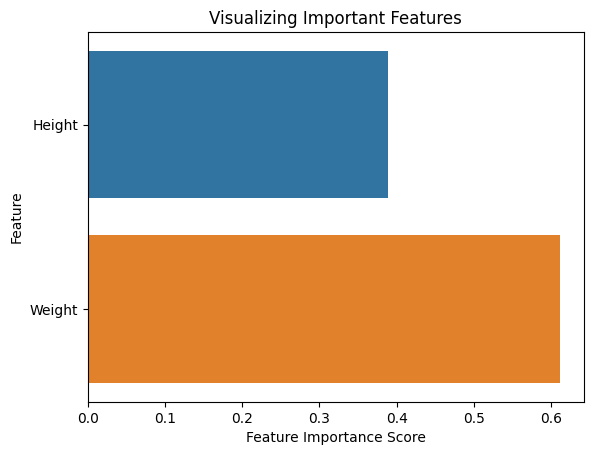

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot (x=fea_imp, y=fea_imp.index)
plt.xlabel ('Feature Importance Score')
plt.ylabel ('Feature')
plt.title ('Visualizing Important Features')


In [18]:
# ADABOOST = Adaptive BOOSTING 
# BOOSTING = Bootstrap Aggregating

# Now its time to build the model bu using ADABOOST Classfier
from sklearn.ensemble import AdaBoostClassifier

#Now we are creating object of the classifier with its some parameters
vsk_ab = AdaBoostClassifier(n_estimators = 120, base_estimator= None, learning_rate=1, random_state = 1)

# n_estimators = subsets of the dataset or The maximum number of estimators at which boosting is terminated. 
                    # In case of perfect fit, the learning procedure is stopped early.

# base_estimator = DecisionTreeClassifier, ExtraTreeClassifier

# Learning rate shrinks the contribution of each classifier by learning_rate. 
# There is a trade-off between learning_rate and n_estimators.

# Controls the random seed / node given at each base_estimator at each boosting iteration. 
# Thus, it is only used when base_estimator exposes a random_state.

# We need to fit the ADABOOST model towards the same Training dataset
# As we have used into Random Forest Classifier.
vsk_ab.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=120, random_state=1)

In [19]:
# predict the model
y_pred_ab = vsk_ab.predict(X_test)

In [20]:
# So far we have completed the following steps:
# 1. Prepared the dataset
# 2. Build the model (ADABOOST)
# 3. Predicted the model by testing dataset

# Now its time to measure the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# we are comparing actual values and prediction values from testing dataset
print(confusion_matrix(y_test, y_pred_ab))

print (accuracy_score(y_test, y_pred_ab)*100)

print (classification_report(y_test, y_pred_ab))

[[2247  217]
 [ 213 2323]]
91.4
              precision    recall  f1-score   support

      Female       0.91      0.91      0.91      2464
        Male       0.91      0.92      0.92      2536

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [21]:
# Here we are imporing classifiers libraries
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier

#Defining the machine learning models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth = 10)
model3 = SVC()
model4 = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

In [22]:
# We need to fit the models towards the training dataset
#Training the machine learning models
model1.fit(X_train, y_train) # LR

LogisticRegression()

In [23]:
model2.fit(X_train, y_train) # DTC

DecisionTreeClassifier(max_depth=10)

In [24]:
model3.fit(X_train, y_train) # SVC

SVC()

In [25]:
model4.fit(X_train, y_train) # KNN

KNeighborsClassifier(metric='euclidean')

In [26]:
# We are predicting by using testing dataset
#Making the prediction
y_pred1 = model1.predict(X_test) # LR
y_pred2 = model2.predict(X_test) # DTC
y_pred3 = model3.predict(X_test) # SVC
y_pred4 = model4.predict(X_test) # KNN

In [27]:
print ("Actual values of the testing data: ", y_test)
print ("Prediction by LR:", y_pred1)
print ("Prediction by DT:", y_pred2)
print ("Prediction by SVC:", y_pred3)
print ("Prediction by KNN:", y_pred4)

print ("Prediction by Random Forest", y_pred_rf)
print ("Prediction by ADABOOST:", y_pred_ab)

Actual values of the testing data:  3059      Male
9103    Female
9872    Female
2321      Male
3146      Male
         ...  
890       Male
6886    Female
7994    Female
6507    Female
8699    Female
Name: Gender, Length: 5000, dtype: object
Prediction by LR: ['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
Prediction by DT: ['Male' 'Female' 'Female' ... 'Female' 'Female' 'Female']
Prediction by SVC: ['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
Prediction by KNN: ['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
Prediction by Random Forest ['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']
Prediction by ADABOOST: ['Female' 'Female' 'Female' ... 'Female' 'Female' 'Female']


In [28]:
# When we need to calculate the accuracy of the model under classification 
# always use testing dataset to get the result

# we are measuring the performance of the model by accuracy score
from sklearn.metrics import accuracy_score

#accuracy scores
log_acc = accuracy_score(y_pred1, y_test) #(prediction value , actual value)
dt_acc = accuracy_score(y_pred2, y_test)
svm_acc = accuracy_score(y_pred3, y_test)
knn_acc = accuracy_score(y_pred4, y_test)

rf_acc = accuracy_score(y_test, y_pred_rf)
ab_acc = accuracy_score(y_test, y_pred_ab)

print ("Accuracy of Logistic Regression Model in %:",log_acc*100)
print ("Accuracy of Decision Tree Model in %:",dt_acc*100)
print("Accuracy of Support Vector Machine Model in %:",svm_acc*100)
print("Accuracy of KNN Model in %:",knn_acc*100)

print ("Accuracy of Random Forest Model in %:", rf_acc*100)
print ("Accuracy of ADABOOST Model in %:", ab_acc*100)


Accuracy of Logistic Regression Model in %: 91.97999999999999
Accuracy of Decision Tree Model in %: 89.68
Accuracy of Support Vector Machine Model in %: 91.24
Accuracy of KNN Model in %: 90.56
Accuracy of Random Forest Model in %: 91.36
Accuracy of ADABOOST Model in %: 91.4
